In [1]:
import pandas as pd

## Dataset Understanding

In [2]:
# Load Dataset
df = pd.read_csv('heart_cleveland.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
# Dataset Shape
print("Dataset shape:", df.shape)

Dataset shape: (297, 14)


In [4]:
# Dataset Columns
print("\nColumn names:\n", df.columns.tolist())


Column names:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
# Checking for Missing Values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
# Target column: 'condition' (0 = no disease, 1 = disease)
df['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

## Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Check for duplicate rows
print("Duplicates:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

Duplicates: 0


In [10]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [11]:
# Split features and target
X = df.drop('condition', axis=1)
y = df['condition']

In [12]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Building (Logistic Regression + Decision Tree)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Logistic Regression

# Train
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test_scaled)

# Accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", round(logreg_acc,2))


Logistic Regression Accuracy: 0.73


In [16]:
# Decision Tree Classifier

# Train
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Accuracy
dtree_acc = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Accuracy:", round(dtree_acc, 2))

Decision Tree Accuracy: 0.77


In [21]:
import joblib

# Save the trained model
joblib.dump(dtree, 'model.pkl')

['model.pkl']

## Metrics

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve, roc_auc_score, r2_score
import matplotlib.pyplot as plt

In [18]:
# Logistic Regression
print("Logistic Regression Metrics:\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
print("Decision Tree Metrics:\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

Logistic Regression Metrics:

Confusion Matrix:
[[23  9]
 [ 7 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Decision Tree Metrics:

Confusion Matrix:
[[24  8]
 [ 6 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



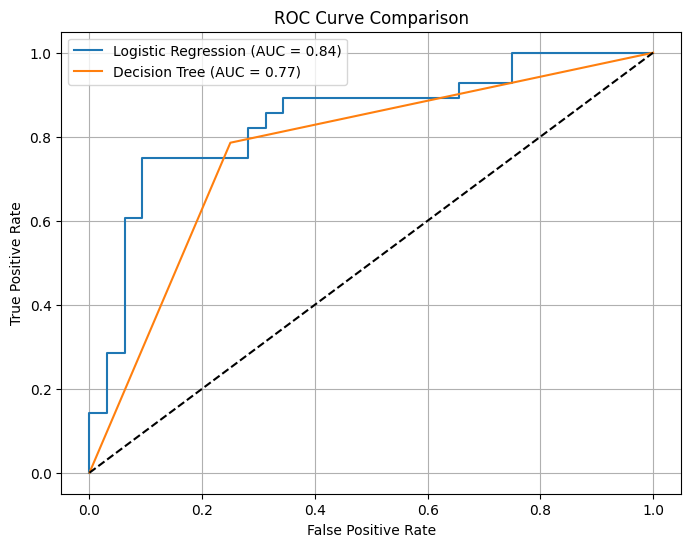

In [19]:
# ROC - AUC Curve

# Logistic Regression Probabilities
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)

# Decision Tree Probabilities
y_prob_dtree = dtree.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dtree)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_logreg):.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dtree):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.savefig("roc_curve_comparison.png")
plt.show()
# plt.savepng('ROC Curve Comparison.png')

## Conclusion

In [20]:
# Decision Tree Performed Better Than Logistic Regression